## Домашнее задание к лекции "Визуализация данных"

Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('happiness2015.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Пропусков нет, что очень хорошо для анализа

In [8]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
# средний показатель счасть в разрезе регионов
happiness_by_region = df[['Region', 'Happiness Score']].groupby('Region').mean()
happiness_by_region

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [13]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

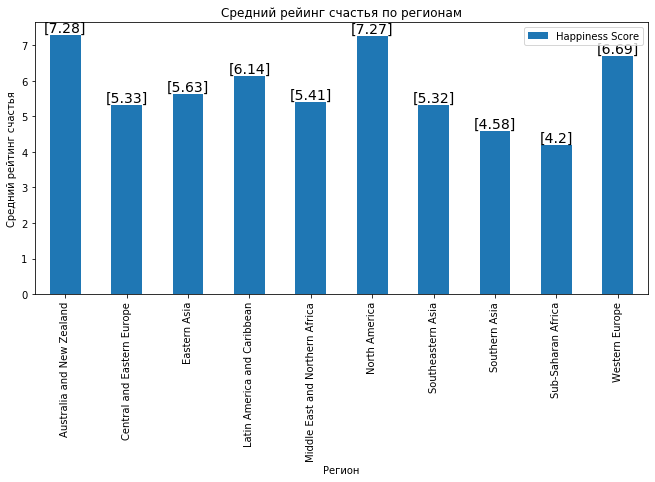

In [21]:
happiness_by_region.plot(kind='bar', 
                         title='Средний рейинг счастья по регионам')

plt.xlabel('Регион')
plt.ylabel('Средний рейтинг счастья')
for i, val in enumerate(happiness_by_region.values):
    plt.text(i, val, val.round(2), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

Можно сделать вывод, что наибольший показатель счастья в регионах "Australia and New Zealand" и "North America", а наихудшие в регионах "Southern Asia" и "Sub-Saharan Africa", и постараться поискать корреляции с другими показателями в датфрейме

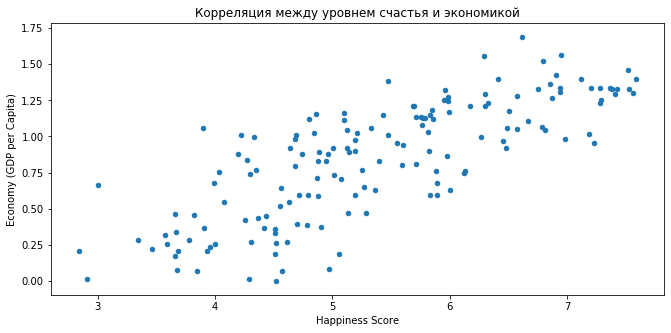

In [106]:
# посмотрим на взаимосвязь оценок счастья и экономикой
df.plot(kind='scatter', 
        x='Happiness Score', 
        y='Economy (GDP per Capita)', 
        title='Корреляция между уровнем счастья и экономикой')
plt.show()

Можно выдвинуть гипотезу, что показатели экономики и уровень счастья имеют значительную корреляцию. Нужно смотреть конкретно по регионам

Хочу еще проверить почему вверху рейтинга мы видим страны Западной Европы, но в целом этот регион проигрывает регионам Северной Америки и Австралии

In [57]:
happiness_westeur = df[df['Region']=='Western Europe']
happiness_aus = df[df['Region']=='Australia and New Zealand']
happiness_NA = df[df['Region']=='North America']

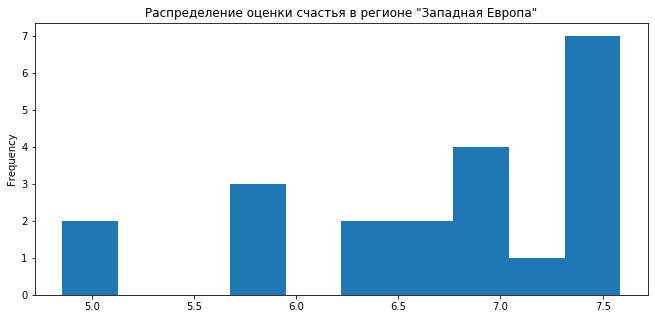

In [69]:
happiness_westeur['Happiness Score'].plot(kind='hist', 
                     title='Распределение оценки счастья в регионе "Западная Европа"')

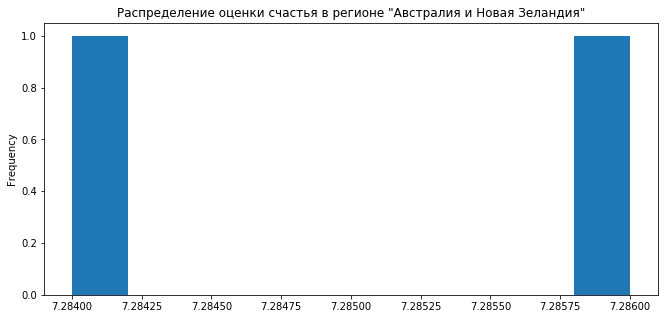

In [70]:
happiness_aus['Happiness Score'].plot(kind='hist', 
                     title='Распределение оценки счастья в регионе "Австралия и Новая Зеландия"')

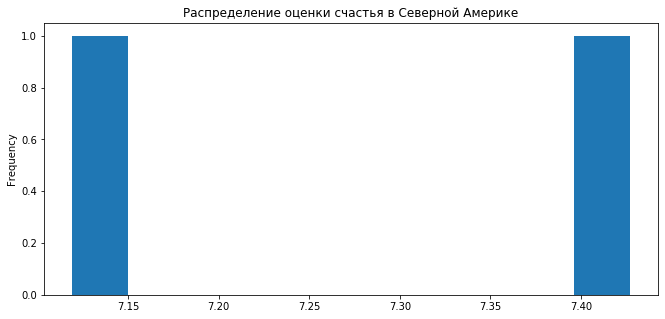

In [71]:
happiness_NA['Happiness Score'].plot(kind='hist', 
                     title='Распределение оценки счастья в Северной Америке')

В регионах лидерах страны имеют приблизительно одинаковую высокую оценку счастья.
В тоже время можно отметить тенденцию, что в Западной Европе неравномерно люди дают оценку счастья и нужно более прицельно изучить, что же дает более высокую оценку счастья в ряде стран этого региона.

In [80]:
import seaborn as sns

pair plot (scatter plot matrix) поможет нам посмотреть на одной картинке, как связаны между собой различные признаки в наборе данных

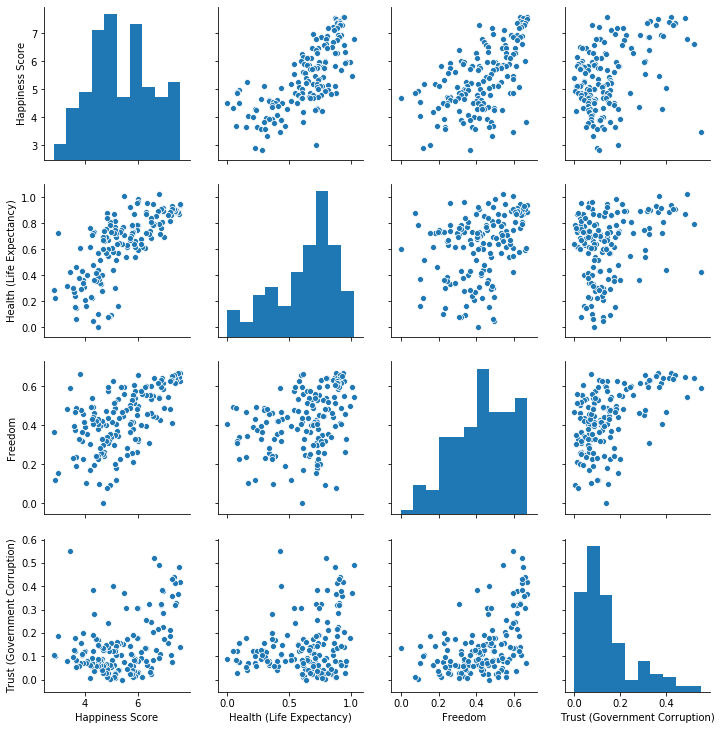

In [83]:
sns.pairplot(df[['Happiness Score', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)']])

Согласно данным диаграммам в большей степени корреляция уровня счастья идет с показателями здоровья и свободы, а вот с уровнем доверия к власти не так четко корреляция прослеживается

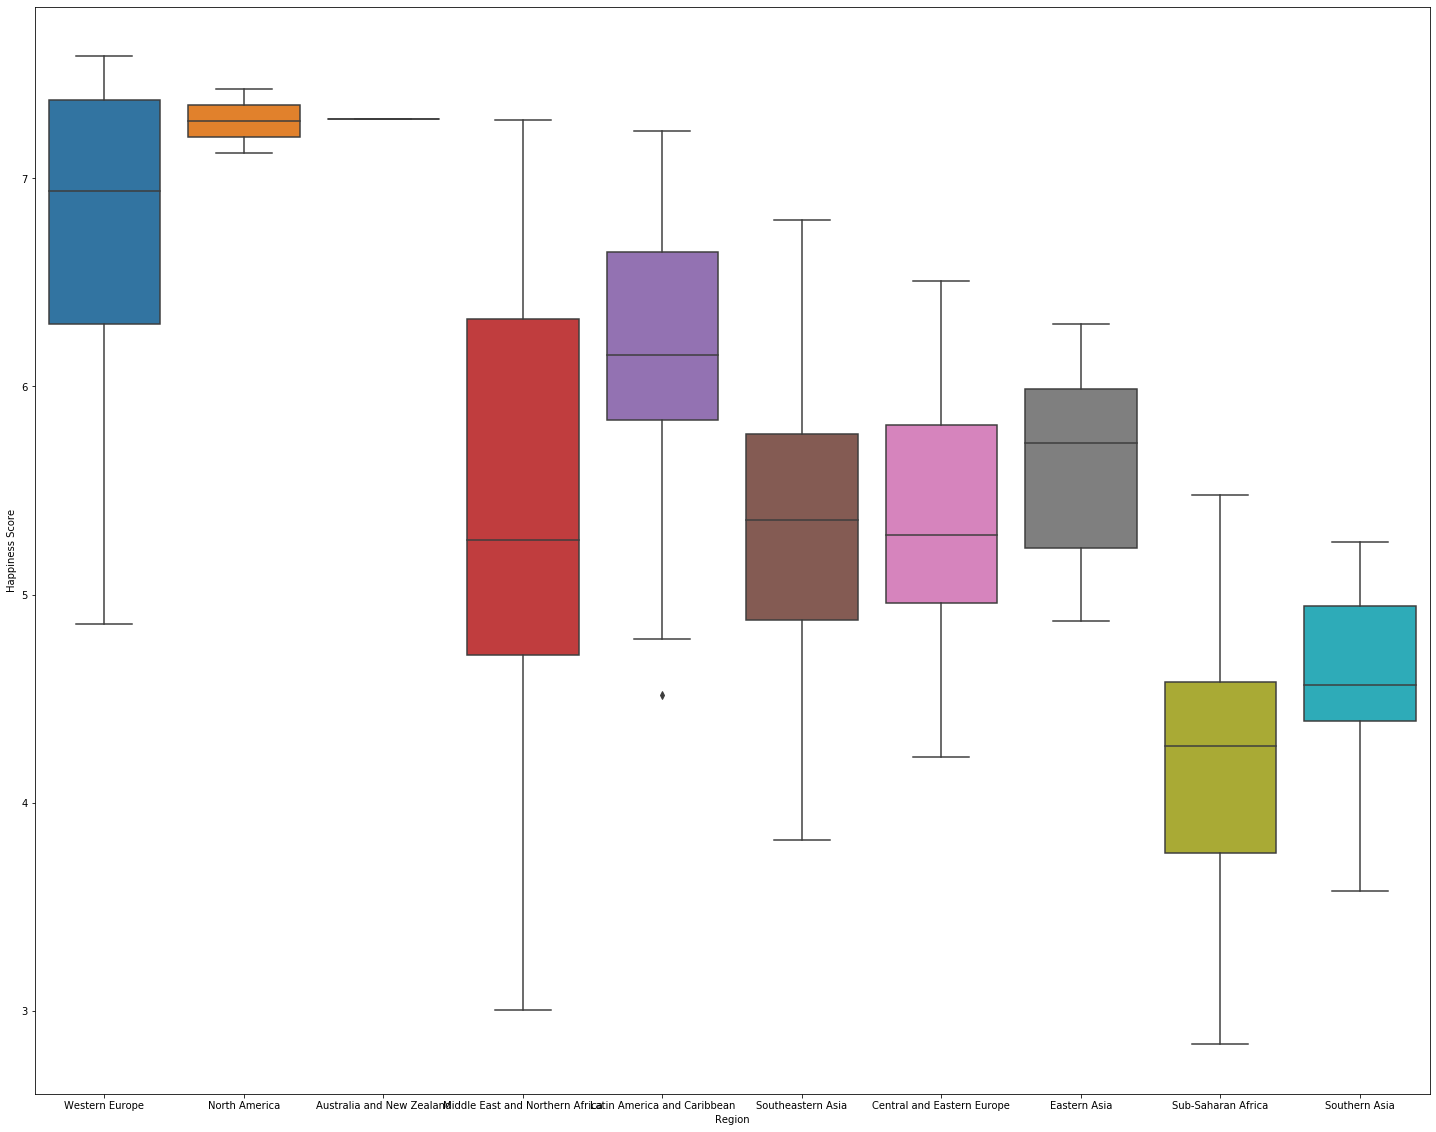

In [99]:
plt.figure(figsize = (25,20))
sns.boxplot(x="Region", y="Happiness Score", 
            data=df[['Region', 'Happiness Score']])

Данные диаграммы показывают высокий разброс оценок счастья в регионе "Middle East and Northern Africa" и, возможно, стоит поделить его на подрегионы для более тонкого понимания причин этих отклонений от средних значений, а также поискать корреляцию в показателях тех стран, которые показывают очень высокие оценки, которые схожи с показателями в регионах-лидерахю А также здесь подтверждается гипотеза, что очень неравномерно распределена оценка счастья с регионе "Western Europe".

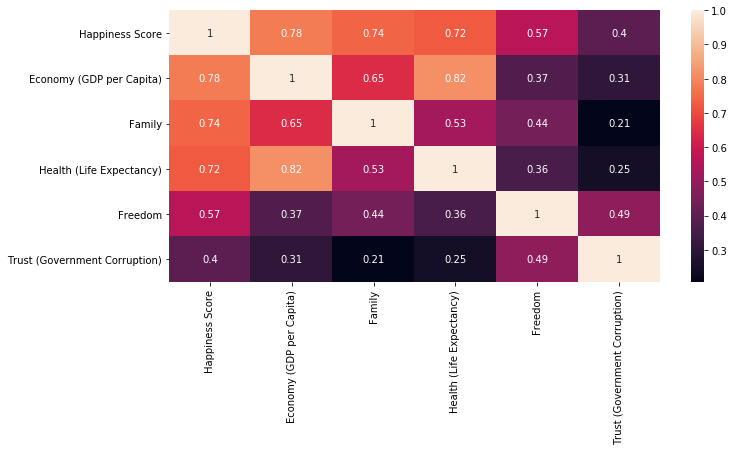

In [100]:
cols = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)']
hm = sns.heatmap(df[cols].corr(),
                 cbar=True,
                 annot=True)

На тепловой карте видна корреляция показателя Happiness Score с показателями 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)' в большей степени, но нужно посмотреть по регионам отдельно

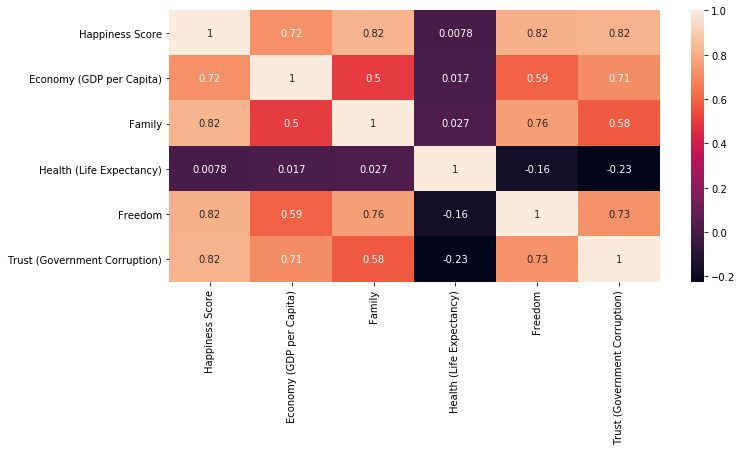

In [107]:
hm = sns.heatmap(df[df['Region']=='Western Europe'][cols].corr(),
                 cbar=True,
                 annot=True)

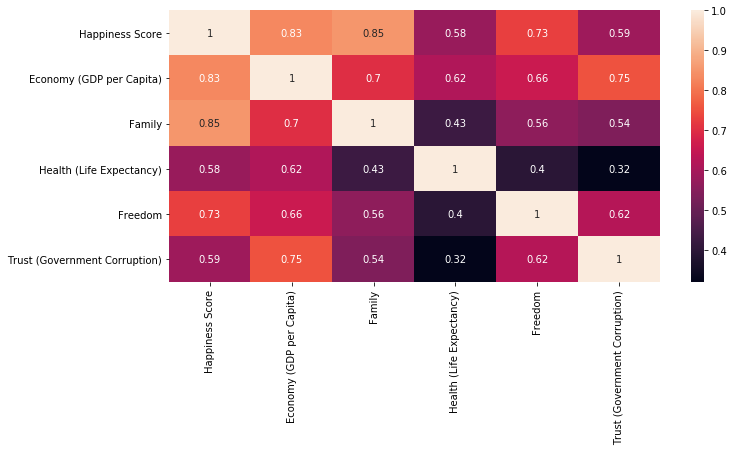

In [102]:
hm = sns.heatmap(df[cols][df['Region']=='Middle East and Northern Africa'].corr(),
                 cbar=True,
                 annot=True)

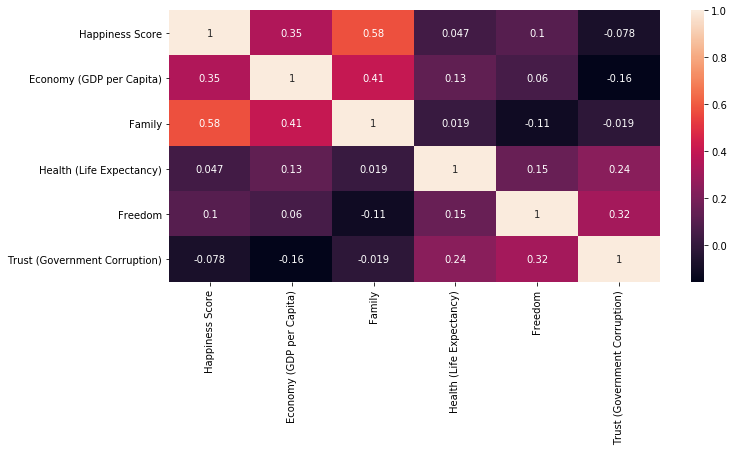

In [104]:
hm = sns.heatmap(df[cols][df['Region']=='Sub-Saharan Africa'].corr(),
                 cbar=True,
                 annot=True)

Детально видно как по регионам разнятся ценности на основании коррелиции разных показателей с Happiness Score